# Classification Demo Using Public SqueezeNet Topology

## Initialize the OpenVINO Environment

In [1]:
! /opt/intel/computer_vision_sdk/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized


### Let's setup some environment variables to make the command lines in this example more readable

Modify these variables to customize the running of this Jupyter Lab

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


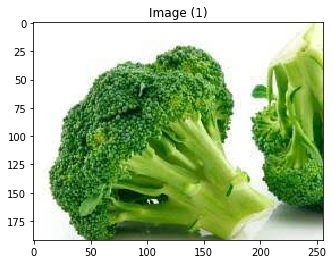

In [29]:
# The image to classify
import matplotlib.image as mimg
image_paths = [
    #/home/ieisw/labs/smart-video-workshop/jupyter/images/car.png',
    '/home/ieisw/labs/smart-video-workshop/jupyter/images/broccoli.jpg'
]
image_files = list(map(lambda image: plt.imread(image), image_paths))
show_images(image_files)

In [30]:
# The path to the IR model and label files
model_xml = '/home/ieisw/openvino_models/ir/squeezenet1.1/squeezenet1.1.xml'
model_bin = '/home/ieisw/openvino_models/ir/squeezenet1.1/squeezenet1.1.bin'
labels_file = '/home/ieisw/openvino_models/ir/squeezenet1.1/squeezenet1.1.labels'

# What hardware will be used? Choices are 'CPU', 'GPU', 'FPGA' and 'HETERO'
device = 'CPU'

# How many of the top matches should we report?
number_top = 10

# Number of Interations
number_iter= 1

# If perf_counts=True then display the performance counters
perf_counts=False

In [31]:
%env DEMO_DIR /opt/intel/computer_vision_sdk/deployment_tools/demo
%env IMAGE_FILE /opt/intel/computer_vision_sdk_2018.3.343/deployment_tools/demo/car.png
%env IMAGE_FILE /home/ieisw/Desktop/broccoli.jpg
%env SQUEEZE_NET_TOPOLOGY /home/ieisw/openvino_models/ir/squeezenet1.1/squeezenet1.1.xml
%env CLASSIFICATION_BINARY /opt/intel/computer_vision_sdk_2018.3.343/deployment_tools/inference_engine/samples/build/intel64/Release/classification_sample

env: DEMO_DIR=/opt/intel/computer_vision_sdk/deployment_tools/demo
env: IMAGE_FILE=/opt/intel/computer_vision_sdk_2018.3.343/deployment_tools/demo/car.png
env: IMAGE_FILE=/home/ieisw/Desktop/broccoli.jpg
env: SQUEEZE_NET_TOPOLOGY=/home/ieisw/openvino_models/ir/squeezenet1.1/squeezenet1.1.xml
env: CLASSIFICATION_BINARY=/opt/intel/computer_vision_sdk_2018.3.343/deployment_tools/inference_engine/samples/build/intel64/Release/classification_sample


## Let's show the image that we are classifying

## Run the C++ Classification Example

In [32]:
!$CLASSIFICATION_BINARY -d CPU -i $IMAGE_FILE -m $SQUEEZE_NET_TOPOLOGY

[ INFO ] InferenceEngine: 
	API version ............ 1.2
	Build .................. 13911
[ INFO ] Parsing input parameters
[ INFO ] Loading plugin

	API version ............ 1.2
	Build .................. lnx_20180510
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files:
	/home/ieisw/openvino_models/ir/squeezenet1.1/squeezenet1.1.xml
	/home/ieisw/openvino_models/ir/squeezenet1.1/squeezenet1.1.bin
[ INFO ] Preparing input blobs
[ WARNING ] Image is resized from (256, 192) to (227, 227)
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference (1 iterations)
[ INFO ] Processing output blobs

Top 10 results:

Image /home/ieisw/Desktop/broccoli.jpg

937 0.9984641 label broccoli
936 0.0007655 label head cabbage
938 0.0007566 label cauliflower
452 0.0000048 label bonnet, poke bonnet
658 0.0000044 label mitten
911 0.0000023 label wool, woolen, woollen
956 0.0000006 label custard apple
824 0.0000006 label stole
903 0.00

## Let Show this Example in Python

Let's import all of the Python modules that are needed to run this classification example

In [33]:
from __future__ import print_function
import sys
import os
from argparse import ArgumentParser
import cv2
import numpy as np
import logging as log
from time import time

In [34]:
from openvino.inference_engine import IENetwork, IEPlugin

In [35]:
plugin = IEPlugin(device='CPU', plugin_dirs=None)

In [36]:
log.info("Loading network files:\n\t{}\n\t{}".format(model_xml, model_bin))

In [37]:
net = IENetwork.from_ir(model=model_xml, weights=model_bin)

Check to be sure that the layers in use by the CPU are all supported

In [38]:
if "CPU" in plugin.device:
    supported_layers = plugin.get_supported_layers(net)
    not_supported_layers = [l for l in net.layers.keys() if l not in supported_layers]
    if len(not_supported_layers) != 0:
        log.error("Following layers are not supported by the plugin for specified device {}:\n {}".
                  format(plugin.device, ', '.join(not_supported_layers)))
        log.error("Please try to specify cpu extensions library path in sample's command line parameters using -l "
                  "or --cpu_extension command line argument")
        sys.exit(1)

Let's see what layers are supported

In [39]:
plugin.get_supported_layers(net)

{'conv1',
 'conv10',
 'data',
 'fire2/concat',
 'fire2/expand1x1',
 'fire2/expand3x3',
 'fire2/relu_expand1x1',
 'fire2/relu_expand3x3',
 'fire2/relu_squeeze1x1',
 'fire2/squeeze1x1',
 'fire3/concat',
 'fire3/expand1x1',
 'fire3/expand3x3',
 'fire3/relu_expand1x1',
 'fire3/relu_expand3x3',
 'fire3/relu_squeeze1x1',
 'fire3/squeeze1x1',
 'fire4/concat',
 'fire4/expand1x1',
 'fire4/expand3x3',
 'fire4/relu_expand1x1',
 'fire4/relu_expand3x3',
 'fire4/relu_squeeze1x1',
 'fire4/squeeze1x1',
 'fire5/concat',
 'fire5/expand1x1',
 'fire5/expand3x3',
 'fire5/relu_expand1x1',
 'fire5/relu_expand3x3',
 'fire5/relu_squeeze1x1',
 'fire5/squeeze1x1',
 'fire6/concat',
 'fire6/expand1x1',
 'fire6/expand3x3',
 'fire6/relu_expand1x1',
 'fire6/relu_expand3x3',
 'fire6/relu_squeeze1x1',
 'fire6/squeeze1x1',
 'fire7/concat',
 'fire7/expand1x1',
 'fire7/expand3x3',
 'fire7/relu_expand1x1',
 'fire7/relu_expand3x3',
 'fire7/relu_squeeze1x1',
 'fire7/squeeze1x1',
 'fire8/concat',
 'fire8/expand1x1',
 'fire8/e

In [40]:
assert len(net.inputs.keys()) == 1, "Sample supports only single input topologies"
assert len(net.outputs) == 1, "Sample supports only single output topologies"

In [41]:
net.batch_size

1

In [42]:
log.info("Preparing input blobs")
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))
net.batch_size = 1

In [43]:
# Read and pre-process input images
n, c, h, w = net.inputs[input_blob]
images = np.ndarray(shape=(n, c, h, w))

Loop through each of the images given on the command line and note if we need to resize them to begin processing them with the convolutional neural network

In [44]:
for i in range(n):
    for image_file in image_paths:
        image = cv2.imread(image_file)
        if image.shape[:-1] != (h, w):
            log.warning("Image {} is resized from {} to {}".format(image_file, image.shape[:-1], (h, w)))
            image = cv2.resize(image, (w, h))
        image = image.transpose((2, 0, 1))  # Change data layout from HWC to CHW
        images[i] = image

In [45]:
log.info("Batch size is {}".format(n))

## Create the Executable Network that is Ready for Inference

In [46]:
log.info("Loading model to the plugin")
exec_net = plugin.load(network=net)
del net

In [47]:
# Start sync inference

log.info("Starting inference ({} iterations)".format(1))
infer_time = []

In [49]:
for i in range(1):
    t0 = time()
    res = exec_net.infer(inputs={input_blob: images})
    infer_time.append((time()-t0)*1000)
log.info("Average running time of one iteration: {} ms".format(np.average(np.asarray(infer_time))))

## Display the Performance Counters

In [50]:
perf_counts = exec_net.requests[0].get_perf_counts()
log.info("Performance counters:")
print("{:<70} {:<15} {:<15} {:<15} {:<10}".format('name', 'layer_type', 'exet_type', 'status', 'real_time, us'))
for layer, stats in perf_counts.items():
    print ("{:<70} {:<15} {:<15} {:<15} {:<10}".format(layer, stats['layer_type'], stats['exec_type'],
                                                       stats['status'], stats['real_time']))


name                                                                   layer_type      exet_type       status          real_time, us
relu_conv10                                                            ReLU            undef           NOT_RUN         0         
fire7/relu_expand3x3                                                   ReLU            undef           NOT_RUN         0         
fire2/relu_squeeze1x1                                                  ReLU            undef           NOT_RUN         0         
fire5/relu_squeeze1x1                                                  ReLU            undef           NOT_RUN         0         
relu_conv1                                                             ReLU            undef           NOT_RUN         0         
fire2/relu_expand3x3                                                   ReLU            undef           NOT_RUN         0         
pool10                                                                 Pooling         

In [51]:
log.info("Processing output blob")
res = res[out_blob]
log.info("Top {} results: ".format(20))

## Open the Labels File and Read it into an Array

In [52]:
with open(labels_file, 'r') as f:
    labels_map = [x.split(sep=' ', maxsplit=1)[-1].strip() for x in f]

In [53]:
labels_map

['Tinca tinca',
 'Carassius auratus',
 'white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'shark, Galeocerdo cuvieri',
 'hammerhead shark',
 'ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'Struthio camelus',
 'Fringilla montifringilla',
 'Carduelis carduelis',
 'finch, linnet, Carpodacus mexicanus',
 'snowbird',
 'bunting, indigo finch, indigo bird, Passerina cyanea',
 'American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'ouzel, dipper',
 'kite',
 'eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'grey owl, great gray owl, Strix nebulosa',
 'fire salamander, Salamandra salamandra',
 'newt, Triturus vulgaris',
 'eft',
 'salamander, Ambystoma maculatum',
 'mud puppy, Ambystoma mexicanum',
 'Rana catesbeiana',
 'frog, tree-frog',
 'frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 'loggerhead turtle, Caretta caretta',
 'turtle, leatherback, leathery turtle, Dermochelys coriacea',
 'tu

In [54]:
for image_file in image_paths:    
    for i, probs in enumerate(res):
        probs = np.squeeze(probs)
        top_ind = np.argsort(probs)[-number_top:][::-1]

        print("Image {}\n".format(image_file))
        for id in top_ind:
            det_label = labels_map[id] if labels_map else "#{}".format(id)
            print("{:.7f} label {}".format(probs[id], det_label))
        print("\n")

Image /home/ieisw/labs/smart-video-workshop/jupyter/images/broccoli.jpg

0.9984641 label broccoli
0.0007655 label cabbage
0.0007566 label cauliflower
0.0000048 label poke bonnet
0.0000044 label mitten
0.0000023 label woolen, woollen
0.0000006 label apple
0.0000006 label stole
0.0000004 label wig
0.0000002 label chameleon, Chamaeleo chamaeleon


